<a href="https://colab.research.google.com/github/rekhachakkara/python_projects/blob/master/airport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas  as  pd
import datetime
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



Mounted at /content/drive


In [3]:
data_sheet = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/airports.dat.txt")
#print(data_sheet)
data_sheet.columns = ["Airport_ID","Name","City","Country","IATA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","Tz database timezone","Type","Source"]
data_airlines = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/Airports2.csv")

#1
data_airline_sheet1 = data_sheet.sort_values(by=['Altitude'],ascending=False)
data_airline_sheet1['rank'] = data_airline_sheet1['Altitude'].rank(ascending=False)
data_sheet1_top = data_airline_sheet1[['Airport_ID','Name','City','Country','Altitude','rank']]
print(data_sheet1_top,20)

#2
data_country = data_sheet.groupby(['Country']).size().to_frame('total_airports').reset_index()
data_country = data_country.sort_values(by=['total_airports'],ascending=False)
data_country['rank'] = data_country['total_airports'].rank(ascending=False)
print(data_country,20)

#3
data_country1 = data_sheet.groupby(['City']).size().to_frame('total_airports').reset_index()
data_country1 = data_country1.sort_values(by=['total_airports'],ascending=False)
data_country1 ['rank'] = data_country1['total_airports'].rank(ascending=False)
print(data_country1, 20)

#4
data_city = data_sheet.groupby(['City'])['Country'].nunique().to_frame("count").reset_index()
data_city = data_city.where(data_city["count"] >=2)
print(data_city, 10)



#data_sheet.sort_values("Type",inplace=True)
#filter
#filter = data_sheet("Type") == "Airport"
#data_sheet.where(filter,inplace=True)



      Airport_ID                                 Name          City  \
6541        9310              Daocheng Yading Airport      Daocheng   
5027        6396                 Qamdo Bangda Airport        Bangda   
6392        8921                     Kangding Airport      Kangding   
5871        7932                  Ngari Gunsa Airport     Shiquanhe   
2624        2762        El Alto International Airport        La Paz   
...          ...                                  ...           ...   
2068        2151                       Ramsar Airport        Ramsar   
4086        4357                       Atyrau Airport        Atyrau   
5720        7646  Jacqueline Cochran Regional Airport  Palm Springs   
1552        1595                   Ein Yahav Airfield     Eyn-yahav   
1557        1600                  Bar Yehuda Airfield       Metzada   

            Country  Altitude    rank  
6541          China     14472     1.0  
5027          China     14219     2.0  
6392          China     140

In [4]:
#part 2
#1
def get_year(row):
    return datetime.datetime.strptime(row['Fly_date'], '%Y-%m-%d').year
data_airlines ["year"] = data_airlines.apply(get_year, axis=1)

data_inbound = data_airlines.where(data_airlines["year"] == 2009)
data_2009 = data_inbound.groupby(['Destination_city'])['Flights'].sum().to_frame('total_inbound_flight').reset_index()
data_2009 = data_2009.sort_values(by=['total_inbound_flight'], ascending=False)

data_2009['rank'] = data_2009['total_inbound_flight'].rank(ascending=False)
data_2009_city = data_2009[['Destination_city','total_inbound_flight','rank']]
data_2009_city.columns = ["city", "total_inbound_flights", "inbound_rank"]
print(data_2009_city, 10)

               city  total_inbound_flights  inbound_rank
74      Chicago, IL               417297.0           1.0
21      Atlanta, GA               396603.0           2.0
93       Dallas, TX               316265.0           3.0
263    New York, NY               278206.0           4.0
167     Houston, TX               250030.0           5.0
..              ...                    ...           ...
261  New Iberia, LA                    1.0         397.0
62   Carbondale, IL                    1.0         397.0
303      Racine, WI                    1.0         397.0
296       Price, UT                    1.0         397.0
359  Starkville, MS                    1.0         397.0

[408 rows x 3 columns] 10


              city  total_outbound_flights   rank
74     Chicago, IL                416742.0    1.0
21     Atlanta, GA                397112.0    2.0
92      Dallas, TX                316739.0    3.0
261   New York, NY                278351.0    4.0
166    Houston, TX                249285.0    5.0
..             ...                     ...    ...
217       Lima, OH                     1.0  394.5
343  Sheboygan, WI                     1.0  394.5
254       Napa, CA                     1.0  394.5
344    Shelton, WA                     1.0  394.5
296      Price, UT                     1.0  394.5

[407 rows x 3 columns] 10
               city  total_inbound_flights  inbound_rank
74      Chicago, IL               417297.0           1.0
21      Atlanta, GA               396603.0           2.0
93       Dallas, TX               316265.0           3.0
263    New York, NY               278206.0           4.0
167     Houston, TX               250030.0           5.0
..              ...            

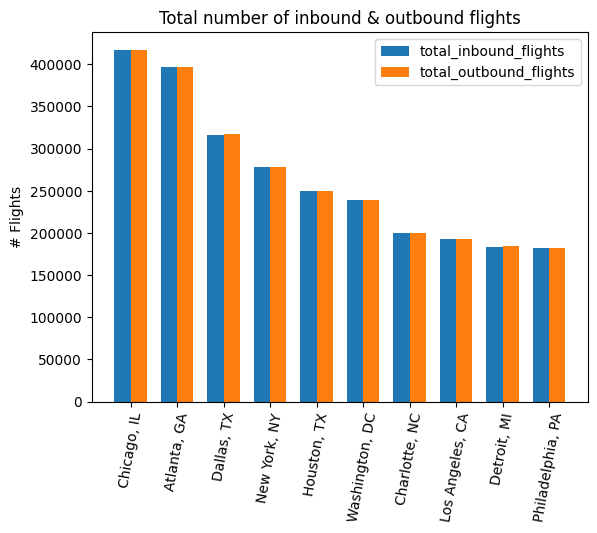

In [11]:
#3 oudata_airlines ["year"] = data_airlines.apply(get_year, axis=1)

data_outbound = data_airlines.where((data_airlines['year'] >= 1999) & (data_airlines["year"] == 2009))
data_2009_out = data_outbound.groupby(['Origin_city'])['Flights'].sum().to_frame('total_outbound_flight').reset_index()
data_2009_out = data_2009_out.sort_values(by=['total_outbound_flight'], ascending=False)

data_2009_out['rank'] = data_2009_out['total_outbound_flight'].rank(ascending=False)
data_2009_outcity = data_2009_out[['Origin_city','total_outbound_flight','rank']]
data_2009_outcity.columns = ["city", "total_outbound_flights", "rank"]
print(data_2009_outcity, 10)

data_inbound = data_airlines.where(data_airlines["year"] == 2009)
data_2009 = data_inbound.groupby(['Destination_city'])['Flights'].sum().to_frame('total_inbound_flight').reset_index()
data_2009 = data_2009.sort_values(by=['total_inbound_flight'], ascending=False)

data_2009['rank'] = data_2009['total_inbound_flight'].rank(ascending=False)
data_2009_city = data_2009[['Destination_city','total_inbound_flight','rank']]
data_2009_city.columns = ["city", "total_inbound_flights", "inbound_rank"]
print(data_2009_city, 10)

#6 merge
data_merge = pd.merge(data_2009_city,data_2009_outcity, on=['city'], how='inner')
print(data_merge, 10)

#7
N = 10
inbound_count = data_merge["total_inbound_flights"].unique()[0:N]
outbound_count = data_merge["total_outbound_flights"].unique()[0:N]
lst_city_name = data_merge["city"].unique()[0:N]
ind = np.arange(N)
width = 0.35
plt.bar(ind, inbound_count, width, label='total_inbound_flights')
plt.bar(ind + width, outbound_count, width, label='total_outbound_flights')

plt.ylabel('# Flights')
plt.title('Total number of inbound & outbound flights')

plt.xticks(ind + width / 2, lst_city_name, rotation=80)
plt.legend(loc='best')
plt.show()


In [6]:
#4 passengers
def get_year(row):
    return datetime.datetime.strptime(row['Fly_date'], '%Y-%m-%d').year
data_airlines["year"] = data_airlines.apply(get_year, axis=1)

data_1999_2009 = data_airlines[(data_airlines['year'] >= 1999) & (data_airlines['year'] <= 2009)]
data1999_to_2009 = data_1999_2009.groupby(['Origin_city'])['Passengers'].sum().to_frame('total_num_passengers').reset_index()
data1999_to_2009 = data1999_to_2009.sort_values(by=['total_num_passengers'], ascending=False)
data1999_to_2009 ['rank'] = data1999_to_2009['total_num_passengers'].rank(ascending=False)
data1999_to_20091 = data1999_to_2009[['Origin_city', 'total_num_passengers','rank']]
print(data1999_to_20091, 10)

#5
data_1999_2009_total = data_airlines.where(data_airlines["year"].isin([2007, 2009]))
data_1999_2009_tot = data_1999_2009_total.groupby(['Origin_city'])['Passengers'].sum().to_frame('total_num_passengers').reset_index()
data_1999_2009_tot = data_1999_2009_tot.sort_values(by=['total_num_passengers'], ascending=False)
data_1999_2009_tot ['rank'] = data_1999_2009_tot['total_num_passengers'].rank(ascending=False)
data_1999_2009_tota = data_1999_2009_tot[['Origin_city', 'total_num_passengers','rank']]
print(data_1999_2009_tota, 10)



         Origin_city  total_num_passengers   rank
93       Chicago, IL             381908565    1.0
28       Atlanta, GA             368972910    2.0
115       Dallas, TX             294826498    3.0
286  Los Angeles, CA             223950429    4.0
342     New York, NY             209454427    5.0
..               ...                   ...    ...
107     Columbus, IN                     0  479.0
369         Peru, IN                     0  479.0
373   Pine Bluff, AR                     0  479.0
382   Portsmouth, OH                     0  479.0
532   Zanesville, OH                     0  479.0

[533 rows x 3 columns] 10
         Origin_city  total_num_passengers   rank
80       Chicago, IL            69706056.0    1.0
25       Atlanta, GA            69454003.0    2.0
100       Dallas, TX            55229445.0    3.0
287     New York, NY            43328550.0    4.0
243  Los Angeles, CA            39905708.0    5.0
..               ...                   ...    ...
181      Holland, MI   

KeyError: 'city'